# **Final Project :** 
**Title :** Car Price Prediction 
 
**Done By :** 

Sondos Hosny Deraz 

Ahmed Mohamed Ali

**Abstract :** 

This project analyse dataset taken from kaggle ( https://www.kaggle.com/venkatabhaskar/car-price/version/1 ), by applying some of data visualization, data preprocessing, Data Analysis ( pandas and numpy ), and machine learning.

### **1. Importing all the liberaries and packages needed.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **2. Uploading dataset ( csv file ) :**

In [ ]:
# inspecting the first 5 rows of the dataframe

df = pd.read_csv('/content/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### **3. Data analysis :**

In [ ]:
# getting some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# checking the number of missing values


df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# checking the distribution of some categorical data
print(df.fueltype.value_counts())
print(df.carbody.value_counts())
print(df.enginetype.value_counts())
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


### **4. Data visualization :**

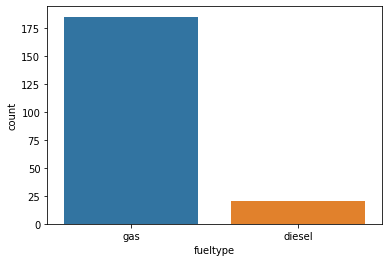

In [ ]:
sns.countplot(x='fueltype', data=df)

In [ ]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

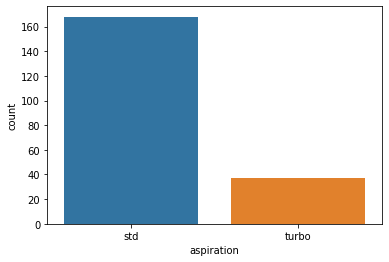

In [ ]:
sns.countplot(x='aspiration', data=df)

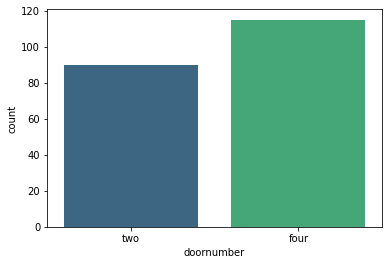

In [ ]:
sns.countplot(x='doornumber', data=df , palette='viridis')

In [ ]:
body = df['carbody'].value_counts()
body

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

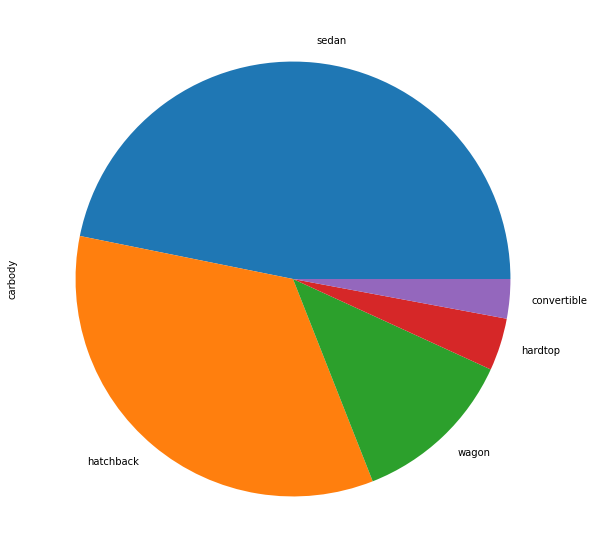

In [ ]:
plot = body.plot.pie( figsize=(10, 10))

In [ ]:
dwheel= df['drivewheel'].value_counts()
dwheel

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

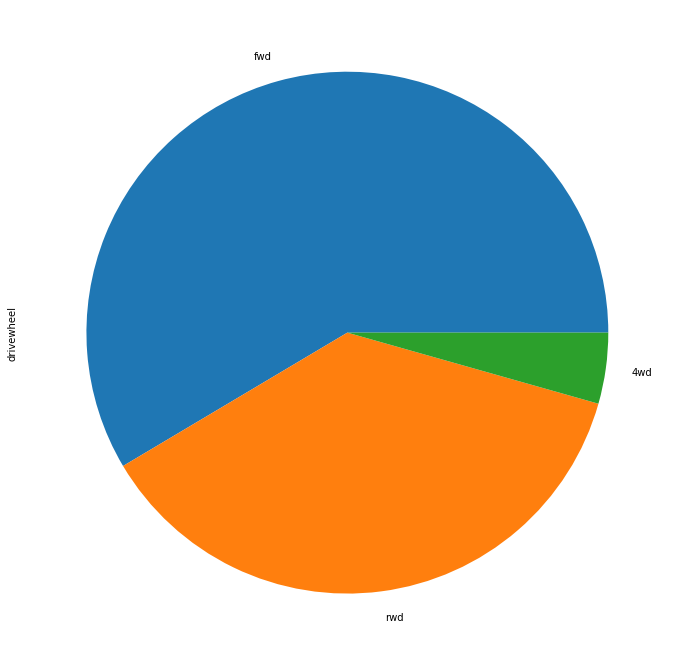

In [ ]:
plot = dwheel.plot.pie( figsize=(12, 12))

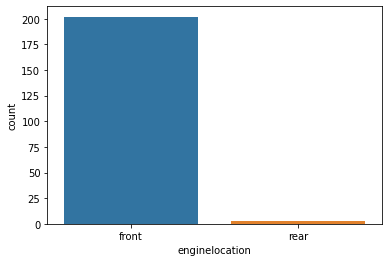

In [ ]:
sns.countplot(x='enginelocation', data=df)

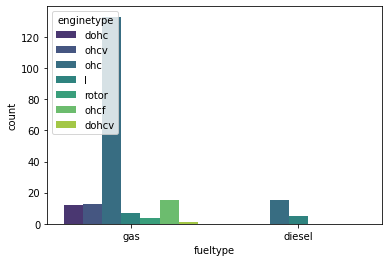

In [ ]:
sns.countplot(x='fueltype', data=df, hue='enginetype', palette='viridis')

In [ ]:
z = df[['carlength' , 'carwidth' , 'carheight' ]]

In [ ]:
continuous=list(z.columns)
continuous

['carlength', 'carwidth', 'carheight']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

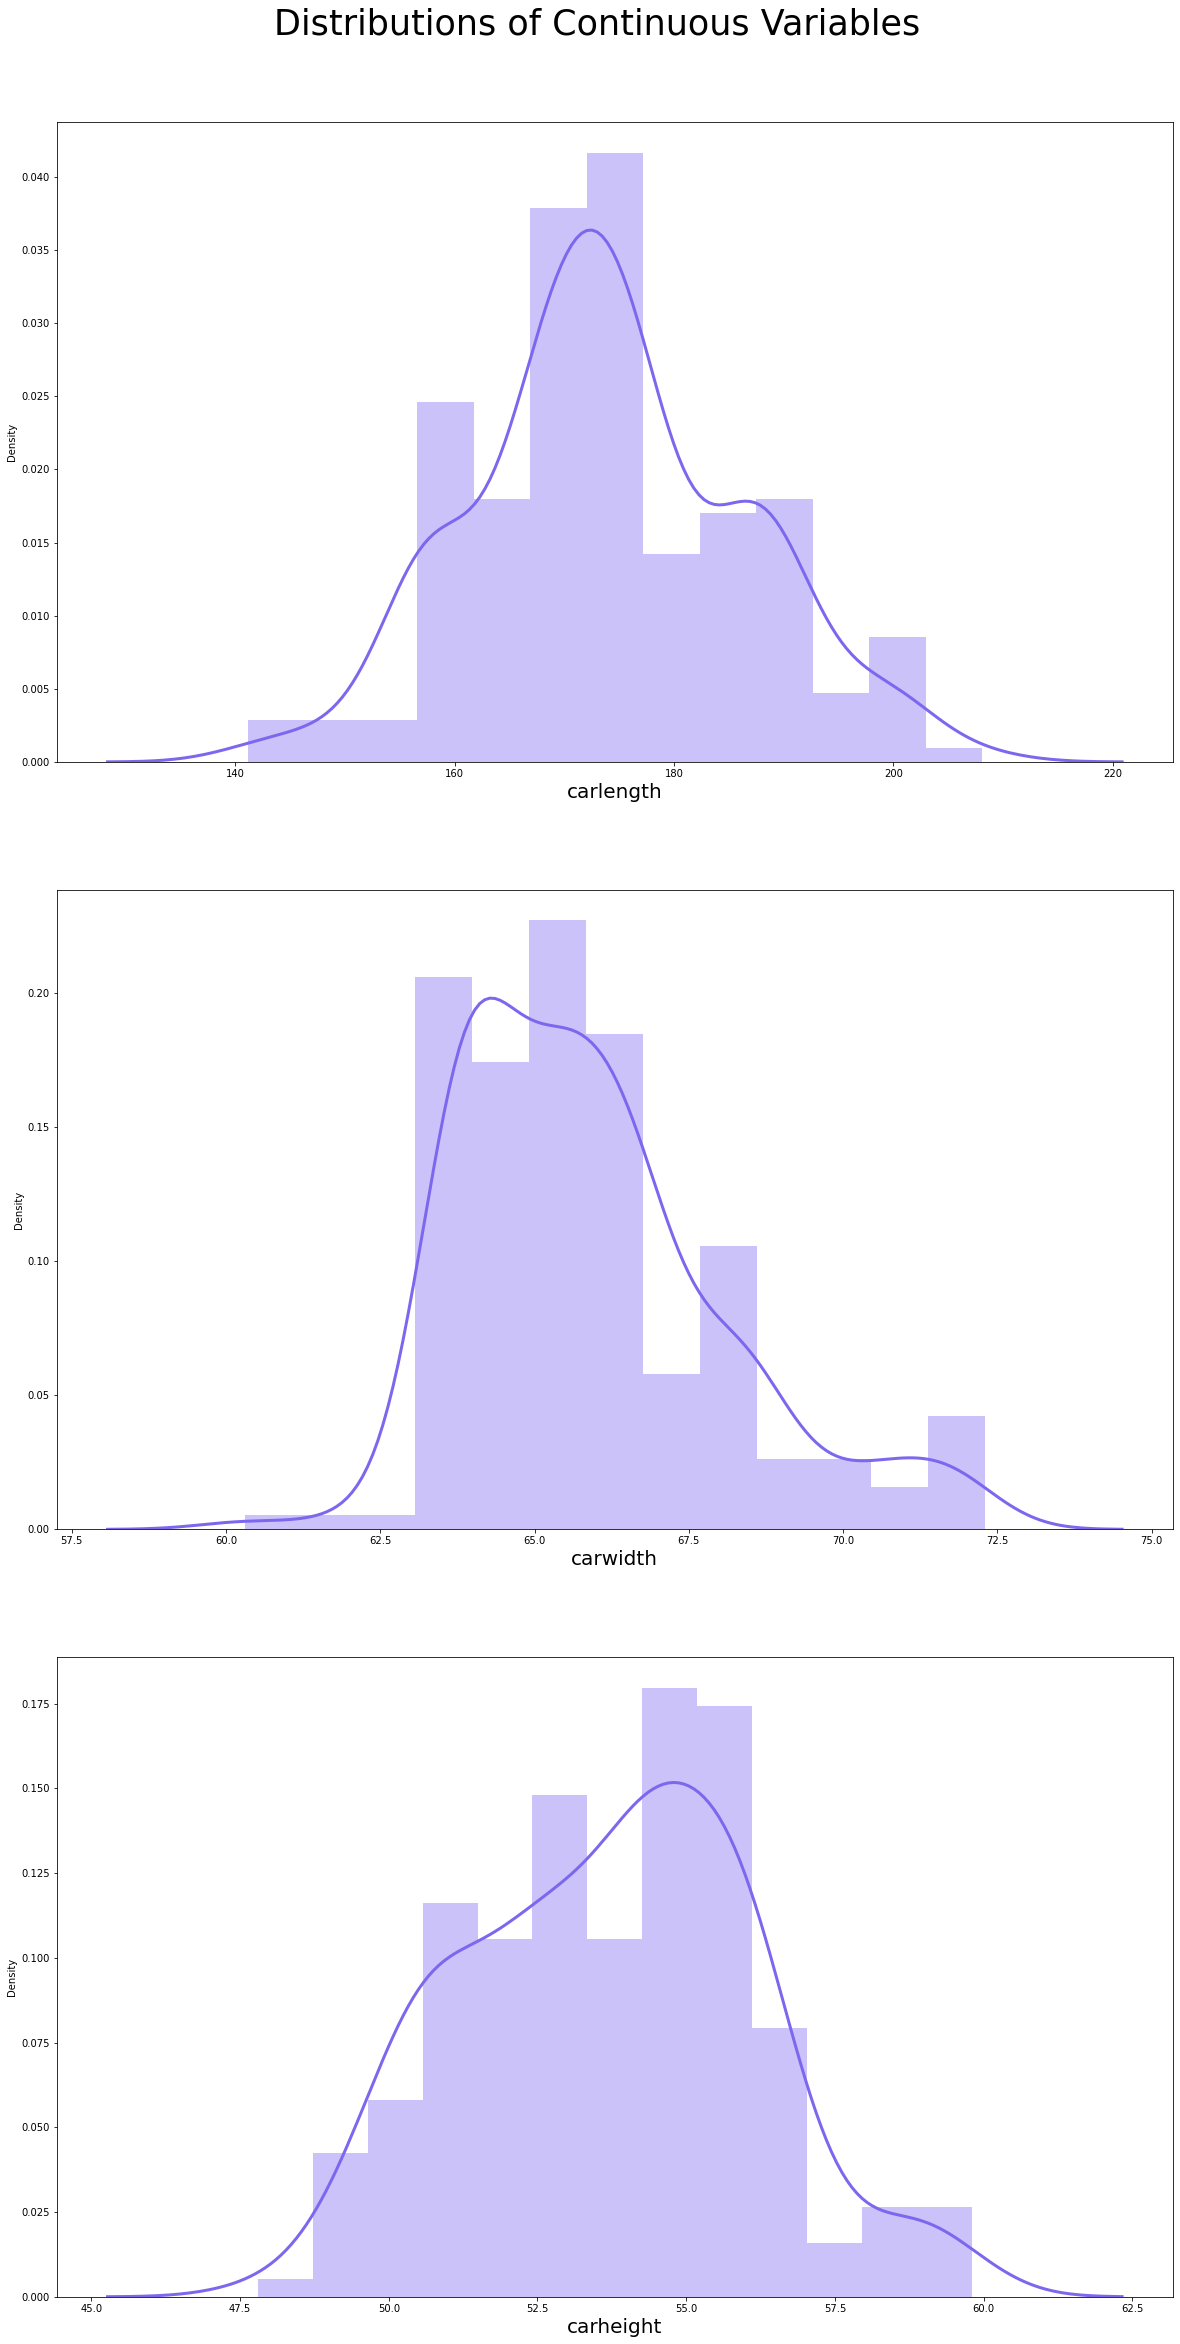

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,40))
for col in continuous:
    i = continuous.index(col)
    sns.distplot(df[col], ax=axes[i], bins=13, kde_kws={"lw":3}, color="mediumslateblue")
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=20)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=10)
figure.suptitle("Distributions of Continuous Variables", fontsize=35, y=0.92)
plt.show()

### **5. Data Preprocessing :**

In [ ]:
df.doornumber = df.doornumber.replace('two', 2) \
    .replace('four', 4) 

In [ ]:
df.cylindernumber = df.cylindernumber.replace('two', '2') \
    .replace('four', 4) \
    .replace('three', 3) \
    .replace('five', 5) \
    .replace('six', 6) \
    .replace('eight', 8) \
    .replace('twelve', 12) 

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['fueltype'].unique()
fueltype = pd.get_dummies(df['fueltype'],drop_first=True)

In [ ]:
df = df.drop('fueltype',axis=1)


In [ ]:
df = pd.concat([df,fueltype] ,axis=1 )

In [ ]:
df['aspiration'].unique()
aspiration = pd.get_dummies(df['aspiration'],drop_first=True)

In [ ]:
df = df.drop('aspiration',axis=1)


In [ ]:
df = pd.concat([df,aspiration] ,axis=1 )

In [ ]:
df['carbody'].unique()
carbody = pd.get_dummies(df['carbody'],drop_first=True)

In [ ]:
df = df.drop('carbody',axis=1)

In [ ]:
df = pd.concat([df,carbody] ,axis=1 )

In [ ]:
df['drivewheel'].unique()
drivewheel = pd.get_dummies(df['drivewheel'],drop_first=True)

In [ ]:
df = df.drop('drivewheel',axis=1)

In [ ]:
df = pd.concat([df,drivewheel] ,axis=1 )

In [ ]:
df['enginelocation'].unique()
enginelocation = pd.get_dummies(df['enginelocation'],drop_first=True)

In [ ]:
df = df.drop('enginelocation',axis=1)

In [ ]:
df = pd.concat([df,enginelocation] ,axis=1 )

In [ ]:
df['fuelsystem'].unique()
fuelsystem = pd.get_dummies(df['fuelsystem'],drop_first=True)

In [ ]:
df = df.drop('fuelsystem',axis=1)

In [ ]:
df = pd.concat([df,fuelsystem] ,axis=1 )

In [ ]:
df['enginetype'].unique()
enginetype = pd.get_dummies(df['enginetype'],drop_first=True)

In [ ]:
df = df.drop('enginetype',axis=1)

In [ ]:
df = pd.concat([df,enginetype] ,axis=1 )

In [ ]:
''' another solution to encode strings

df.replace({'fueltype':{'gas':0,'diesel':1\}},inplace=True)

''' 

" another solution to encode strings\n\ndf.replace({'fueltype':{'gas':0,'diesel':1\\}},inplace=True)\n\n"

In [ ]:
df.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### **6. Machine Learning :**

In [ ]:
x = df.drop(['CarName' , 'price'],axis=1)
y = df['price']

KeyError: ignored

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
score = metrics.r2_score(y_train,y_pred)
score

0.9384643374592062

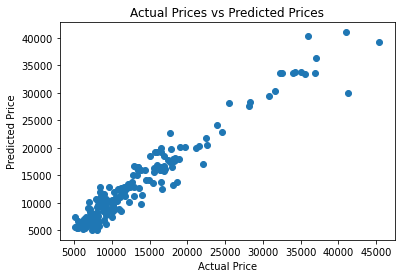

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()